# Ali Hussain Syed

# Step 1 Data Cleaning

### Import Libraries

In [44]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

### Load Data

In [2]:
achievement_data = pd.read_csv('CAMP_D1_STAAR1_final.csv')

In [3]:
demographic_data = pd.read_csv('CAMPRATE_final.csv')

### EDA

#### Checking the first few columns of both datasets to determine the correct merging column

In [4]:
achievement_data.head(5)

,cda00a001219r,cda00a001319r,cda00a001s19r,cda00ar01219r,cda00ar01319r,cda00ar01s19r,CAMPUSID
0,67.0,22.0,86.0,63.0,12.0,78.0,1902001
1,57.0,26.0,82.0,57.0,36.0,81.0,1902041
2,62.0,36.0,86.0,60.0,36.0,86.0,1902103
3,63.0,25.0,80.0,51.0,9.0,68.0,1903001
4,NaN,NaN,NaN,NaN,NaN,NaN,1903002


In [5]:
achievement_data.columns

Index(['cda00a001219r', 'cda00a001319r', 'cda00a001s19r', 'cda00ar01219r',
       'cda00ar01319r', 'cda00ar01s19r', 'CAMPUSID'],
      dtype='object')

In [6]:
achievement_data.isnull().sum()

cda00a001219r    205
cda00a001319r    205
cda00a001s19r    205
cda00ar01219r    216
cda00ar01319r    216
cda00ar01s19r    216
CAMPUSID           0
dtype: int64

In [7]:
demographic_data.head(5)

,campname,cpe0312c,cpe0312p,cpetecoc,cpetecop,cpetlepc,cpetlepp,cpetspec,cpetspep,grdspan,CAMPUSID
0,CAYUGA H S,179,100.000000,70,39.099998,0,0.0,36,20.1,'09 - 12,1902001
1,CAYUGA MIDDLE,119,100.000000,42,35.299999,1,0.8,13,10.9,'06 - 08,1902041
2,CAYUGA EL,143,53.799999,128,48.099998,0,0.0,35,13.2,'PK - 05,1902103
3,ELKHART H S,376,100.000000,187,49.700001,0,0.0,43,11.4,'09 - 12,1903001
4,ELKHART DAEP,2,100.000000,2,100.000000,0,0.0,0,0.0,'08 - 10,1903002


In [8]:
demographic_data.isnull().sum()

campname    0
cpe0312c    0
cpe0312p    0
cpetecoc    0
cpetecop    0
cpetlepc    0
cpetlepp    0
cpetspec    0
cpetspep    0
grdspan     0
CAMPUSID    0
dtype: int64

### Merge 2 Datasets to create single data set

- inner join will drop any cases that do not appear in both data sets
- join will be based on the CAMPUSID as it appears in both the datasets

In [9]:
merged_data = pd.merge(achievement_data, demographic_data, on='CAMPUSID', how='inner')

In [10]:
merged_data.head()

,cda00a001219r,cda00a001319r,cda00a001s19r,cda00ar01219r,cda00ar01319r,cda00ar01s19r,CAMPUSID,campname,cpe0312c,cpe0312p,cpetecoc,cpetecop,cpetlepc,cpetlepp,cpetspec,cpetspep,grdspan
0,67.0,22.0,86.0,63.0,12.0,78.0,1902001,CAYUGA H S,179,100.000000,70,39.099998,0,0.0,36,20.1,'09 - 12
1,57.0,26.0,82.0,57.0,36.0,81.0,1902041,CAYUGA MIDDLE,119,100.000000,42,35.299999,1,0.8,13,10.9,'06 - 08
2,62.0,36.0,86.0,60.0,36.0,86.0,1902103,CAYUGA EL,143,53.799999,128,48.099998,0,0.0,35,13.2,'PK - 05
3,63.0,25.0,80.0,51.0,9.0,68.0,1903001,ELKHART H S,376,100.000000,187,49.700001,0,0.0,43,11.4,'09 - 12
4,NaN,NaN,NaN,NaN,NaN,NaN,1903002,ELKHART DAEP,2,100.000000,2,100.000000,0,0.0,0,0.0,'08 - 10


In [11]:
merged_data.shape

(8194, 17)

- Generate copies of two variables in the data set, creating variables with more intuitive names. 
    - For the first variable, create a new variable that is equal to the current variable that is labeled “Campus 2019 Domain 1A: Masters Grade Level STD, Summed Grades 3-12, All Students Reading/ELA Rate ”. 
    - For the second variable, create a new variable that is equal to the current variable that is labeled “Campus 2019 Student: % Econ Disadv”. 
    - (Hint: these variables have missing data that you’ll need to address)
    - Codebook for achievement data https://rptsvr1.tea.texas.gov/perfreport/account/2019/download/camp_d1_staar1.html
    - Codebook for campus characteristic data https://rptsvr1.tea.texas.gov/perfreport/account/2019/download/camprate.html 

### Lets load in the codebooks

#### Achievement codebook

In [12]:
achievement_codebook = pd.read_excel('achievement codebook.xlsx')

In [13]:
achievement_codebook.head(10)

,NAME,TYPE,LENGTH,LABEL
0,CAMPUS,Character,9,Campus Number
1,DISTRICT,Character,9,District Number
2,CD000A001019D,Numeric,8,"Campus 2019 Domain 1A: Summed Grades 3-12, Cur..."
3,CD000A001219N,Numeric,8,"Campus 2019 Domain 1A: Meets Grade Level STD, ..."
4,CD000A001219R,Numeric,8,"Campus 2019 Domain 1A: Meets Grade Level STD, ..."
5,CD000A001319N,Numeric,8,Campus 2019 Domain 1A: Masters Grade Level STD...
6,CD000A001319R,Numeric,8,Campus 2019 Domain 1A: Masters Grade Level STD...
7,CD000A001S19N,Numeric,8,Campus 2019 Domain 1A: Approaches Grade Level ...
8,CD000A001S19R,Numeric,8,Campus 2019 Domain 1A: Approaches Grade Level ...
9,CD000AR01019D,Numeric,8,"Campus 2019 Domain 1A: Summed Grades 3-12, Cur..."


#### Campus Characteristics codebook

In [14]:
campus_charac_codebook = pd.read_excel('campus charac codebook.xlsx')

In [15]:
campus_charac_codebook.head(10)

,NAME,TYPE,LENGTH,LABEL
0,CAMPUS,Character,9.0,Campus Number
1,CAMPNAME,Character,34.0,Campus Name
2,DISTRICT,Character,6.0,District Number
3,DISTNAME,Character,34.0,District Name
4,COUNTY,Character,3.0,County Number
5,CNTYNAME,Character,34.0,County Name
6,REGION,Character,2.0,Region Number
7,REGNNAME,Character,34.0,Region Name
8,CDALLS,Numeric,8.0,Campus 2019 Overall Scaled Score
9,C_RATING,Character,30.0,Campus 2019 Overall Rating


### Identify relative columns from the codebooks

In [16]:
masters_grade_label = "Campus 2019 Domain 1A: Masters Grade Level STD, Summed Grades 3-12, All Students Reading/ELA Rate"
# Find the masters_grade_label
masters_grade_column = achievement_codebook[achievement_codebook['LABEL'].str.contains
                                            (masters_grade_label, na=False, case=False)]

In [17]:
masters_grade_column

,NAME,TYPE,LENGTH,LABEL
69,CDA00AR01319R,Numeric,8,Campus 2019 Domain 1A: Masters Grade Level STD...


In [18]:
econ_disadv_label = "Campus 2019 Student: % Econ Disadv"
econ_disadv_column = campus_charac_codebook[campus_charac_codebook['LABEL'].str.contains
                                            (econ_disadv_label, na=False, case=False)]

In [19]:
econ_disadv_column

,NAME,TYPE,LENGTH,LABEL
78,CPETECOP,Numeric,8.0,Campus 2019 Student: % Econ Disadv


### Find the corresponding columns within the merged data

In [20]:
merged_data.columns

Index(['cda00a001219r', 'cda00a001319r', 'cda00a001s19r', 'cda00ar01219r',
       'cda00ar01319r', 'cda00ar01s19r', 'CAMPUSID', 'campname', 'cpe0312c',
       'cpe0312p', 'cpetecoc', 'cpetecop', 'cpetlepc', 'cpetlepp', 'cpetspec',
       'cpetspep', 'grdspan'],
      dtype='object')

- CDA00AR01319R and CPETECOP are found within the merged dataset

### Create copies of identified columns with more intuitive names

In [21]:
merged_data["Masters_Grade_Level_Rate"] = merged_data["cda00ar01319r"]
merged_data["Econ_Disadv_Percentage"] = merged_data["cpetecop"]

### Check for Missing Values for the Variables Created

In [22]:
missing_values= merged_data[["Masters_Grade_Level_Rate", "Econ_Disadv_Percentage"]].isnull().sum()

In [23]:
missing_values

Masters_Grade_Level_Rate    178
Econ_Disadv_Percentage        0
dtype: int64

- only Masters_Grade_Level_Rate seems to be having missing data out of the two variables

##### Calculate the percentage of rows with missing values for Masters_Grade_Level_Rate

In [24]:
total_rows = len(merged_data)
missing_percentage = (missing_values["Masters_Grade_Level_Rate"] / total_rows) * 100
missing_percentage

2.172321210641933

- since we have only 2.17% of data missing, it is prefered to drop it to avoid any bias 

### Remove Missing Data

In [25]:
merged_data.shape

(8194, 19)

In [26]:
# Clean the data by removing rows with missing values in "Masters_Grade_Level_Rate"
merged_data_cleaned = merged_data.dropna(subset=["Masters_Grade_Level_Rate"])

In [27]:
merged_data_cleaned.shape

(8016, 19)

# Step 2 Analysis

### Identify the 5 campuses with the largest enrollment of students in grades 3-12 in the 2018-19 school year. Provide a list of these schools, and the following demographic characteristics for each campus
    - Proportion of economically disadvantaged students
    - Proportion of Limited English Proficiency (LEP) students
    - Proportion of special education students

In [33]:
# Sort the data based on the 'cpe0312c' column in descending order and select the top 5 campuses
top_5_campuses = merged_data_cleaned.sort_values(by="cpe0312c", ascending=False).head(5)

# Extract the desired demographic characteristics for these campuses
selected_columns = ["campname", "cpe0312c", "Econ_Disadv_Percentage", "cpetlepp", "cpetspep"]
top_5_campuses_selected = top_5_campuses[selected_columns]

- Here are the 5 campuses with the largest enrollment of students in grades 3-12 for the 2018-19 school year, along with the demographic characteristics for each campus

In [34]:
top_5_campuses_selected

,campname,cpe0312c,Econ_Disadv_Percentage,cpetlepp,cpetspep
3966,TEXAS CONNECTIONS ACADEMY AT HOUST,5680,40.400002,1.5,5.2
1266,ALLEN H S,5098,15.100000,3.0,9.2
3855,NORTH SHORE SENIOR HIGH,4534,81.800003,15.3,10.4
2447,LEWISVILLE H S,4478,61.000000,22.4,13.4
4523,TEXAS VIRTUAL ACADEMY AT HALLSVILL,4438,36.000000,2.7,11.8


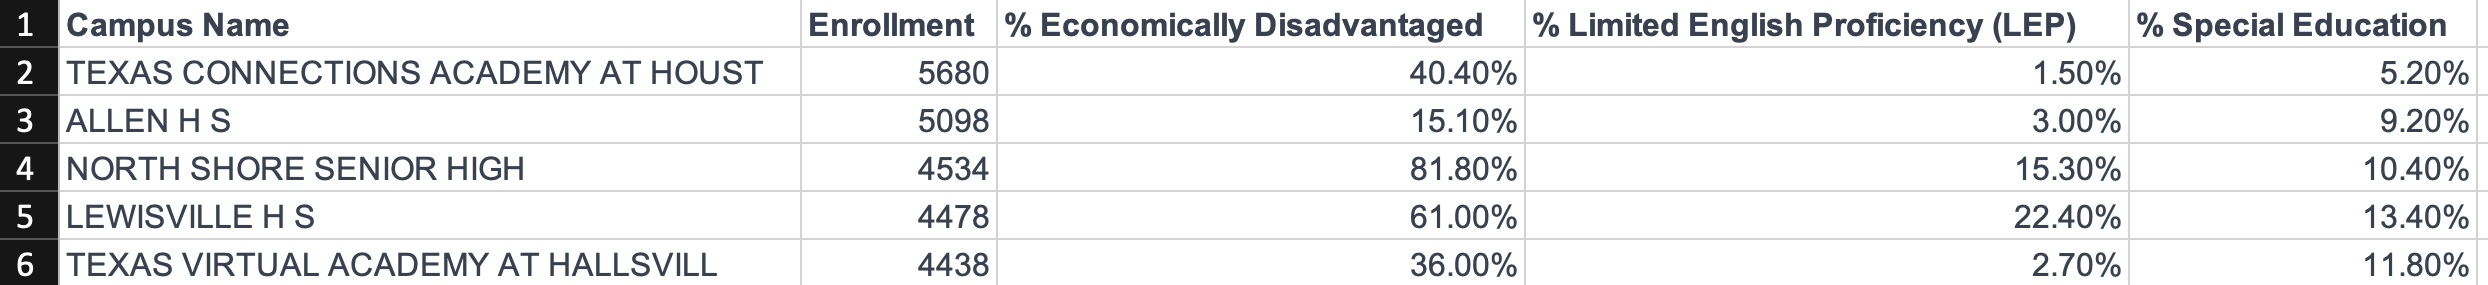

### Using all campuses in the merged data file, estimate the correlation between the proportion of economically disadvantaged students on a campus and the proportion of students in grades 3-12 who “master” standards on the Reading/ELA STAAR assessment in the 2018-19 school year

In [35]:
# Calculate the correlation between the proportion of economically disadvantaged students 
# and the proportion of students who "master" standards on the Reading/ELA STAAR assessment
correlation = merged_data_cleaned["Econ_Disadv_Percentage"].corr(merged_data_cleaned["Masters_Grade_Level_Rate"])

correlation

-0.5789684657966049

- The correlation between the proportion of economically disadvantaged students on a campus and the proportion of students in grades 3-12 who “master” standards on the Reading/ELA STAAR assessment in the 2018-19 school year is approximately −0.579
- This negative value indicates an inverse relationship: as the proportion of economically disadvantaged students increases, the proportion of students mastering the standards on the Reading/ELA STAAR assessment tends to decrease, and vice versa.


# Step 3 Visualization

### Bar chart for the five campuses with the largest enrollment
    - This clearly depicts the demographics for each campus and will be easy to understand for a non-research audience

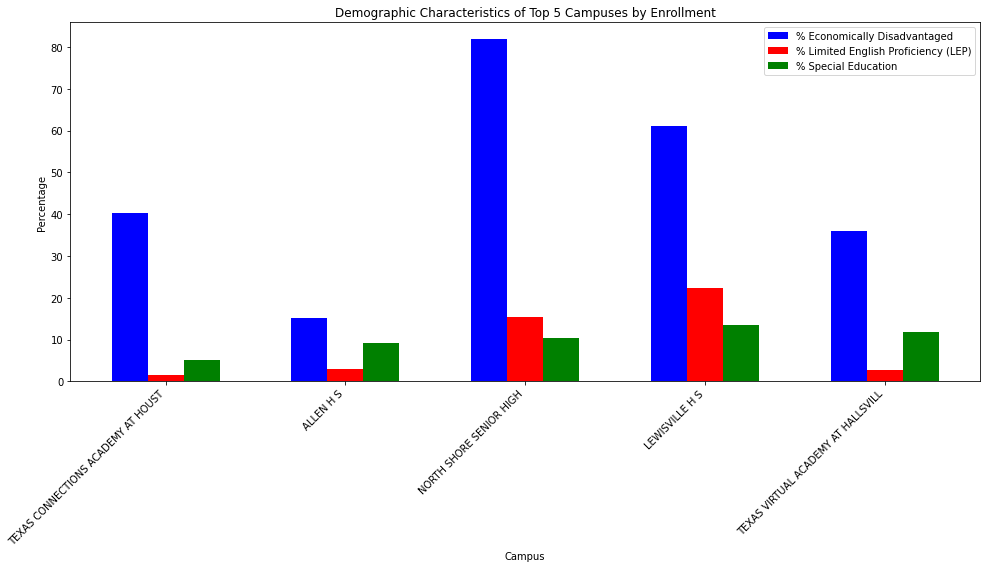

In [36]:
# Set up the figure and axes
fig, ax = plt.subplots(figsize=(14, 8))

# Bar chart for the 5 campuses
bar_width = 0.2
index = range(len(top_5_campuses_selected))

# Plot the bars
bars1 = ax.bar(index, top_5_campuses_selected['Econ_Disadv_Percentage'], bar_width, label='% Economically Disadvantaged', color='b')
bars2 = ax.bar([i+bar_width for i in index], top_5_campuses_selected['cpetlepp'], bar_width, label='% Limited English Proficiency (LEP)', color='r')
bars3 = ax.bar([i+bar_width*2 for i in index], top_5_campuses_selected['cpetspep'], bar_width, label='% Special Education', color='g')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Campus')
ax.set_ylabel('Percentage')
ax.set_title('Demographic Characteristics of Top 5 Campuses by Enrollment')
ax.set_xticks([i+bar_width for i in index])
ax.set_xticklabels(top_5_campuses_selected['campname'], rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()


### Here's the bar chart depicting the demographic characteristics of the top 5 campuses by enrollment:
    - The blue bars represent the percentage of economically disadvantaged students.
    - The red bars represent the percentage of students with limited English proficiency (LEP).
    - The green bars represent the percentage of special education students.
    - The chart provides a clear visual representation of the demographics for each of these campuses.

### Scatter Plot for the correlation:
    - This clearly depicts correlation between the proportion of economically disadvantaged students and the proportion of students mastering the Reading/ELA STAAR assessment.

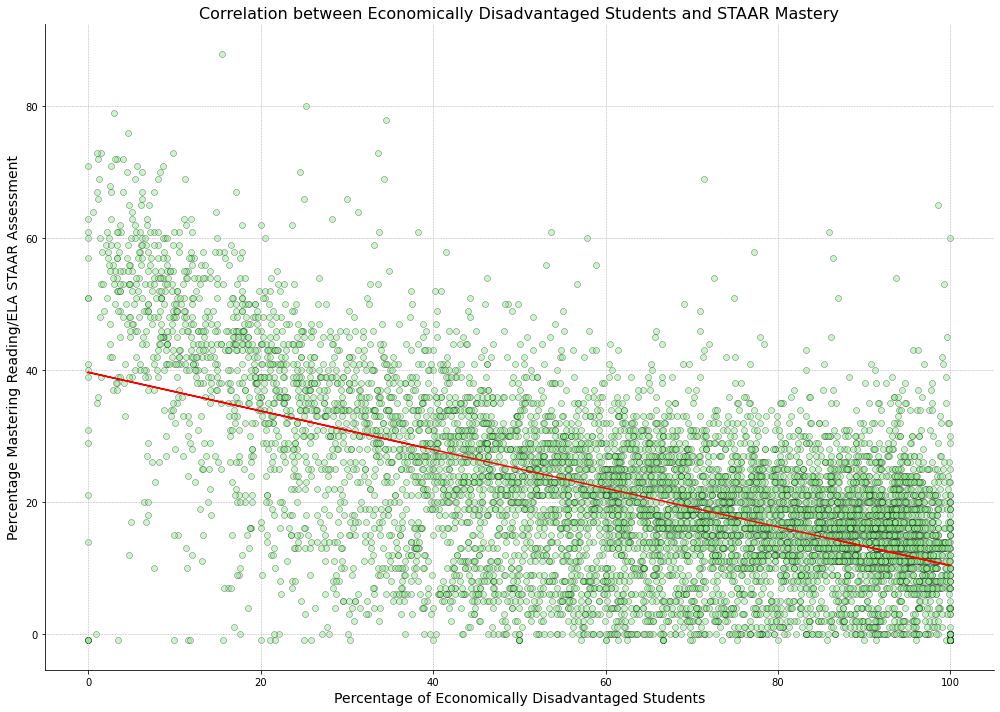

In [42]:
# Set up the figure and axes with enhanced styling
fig, ax = plt.subplots(figsize=(14, 10))

# Scatter plot with enhanced styling
ax.scatter(merged_data_cleaned["Econ_Disadv_Percentage"], 
           merged_data_cleaned["Masters_Grade_Level_Rate"], 
           color='lightgreen', alpha=0.5, edgecolors='black', linewidths=0.5)

# Add regression line
m, b = np.polyfit(merged_data_cleaned["Econ_Disadv_Percentage"], 
                  merged_data_cleaned["Masters_Grade_Level_Rate"], 1)
ax.plot(merged_data_cleaned["Econ_Disadv_Percentage"], m*merged_data_cleaned["Econ_Disadv_Percentage"] + b, color='red')

# Add labels, title, and grid with enhanced styling
ax.set_xlabel('Percentage of Economically Disadvantaged Students', fontsize=14)
ax.set_ylabel('Percentage Mastering Reading/ELA STAAR Assessment', fontsize=14)
ax.set_title('Correlation between Economically Disadvantaged Students and STAAR Mastery', fontsize=16)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


- Each point on the scatter plot represents a campus
- X-axis shows the percentage of economically disadvantaged students.
- Y-axis shows the percentage of students mastering the Reading/ELA STAAR assessment.
- Red line is a regression line, which visually represents the negative trend in the data.

#### According to the scatter plot, we can see a clear negative trend that campuses with a higher percentage of economically disadvantaged students tend to have a lower percentage of students mastering the Reading/ELA STAAR assessment.